<a href="https://colab.research.google.com/github/Elian19-01/Massive-data/blob/main/Project_Unit_3_Spark_elian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 3 Project Spark DataFrame API

#Elian Jared Vega Mugarte

#DATA 5A

Read the instructions and answer the questions.



# Setup

Setup spark for running in local mode using these instructions.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.1.3/spark-3.1.3-bin-hadoop2.7.tgz
!tar xf spark-3.1.3-bin-hadoop2.7.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop2.7"

In [ ]:
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# create the Spark session
from pyspark.sql import SparkSession
# create the session
spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext
spark

# Vietnam War Dataset

**Pres. Johnson**: _What do you think about this Vietnam thing? I’d like to hear you talk a little bit._

**Sen. Russell**: _Well, frankly, Mr. President, it’s the damn worse mess that I ever saw, and I don’t like to brag and I never have been right many times in my life, but I knew that we were going to get into this sort of mess when we went in there._

May 27, 1964

![banner](https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/banner.jpg)

----

The Vietnam War, also known as the Second Indochina War, and in Vietnam as the Resistance War Against America or simply the American War, was a conflict that occurred in Vietnam, Laos, and Cambodia from 1 November 1955 to the fall of Saigon on 30 April 1975. It was the second of the Indochina Wars and was officially fought between North Vietnam and the government of South Vietnam.

**The dataset describes all the air force operation in during the Vietnam War.**

**Bombing_Operations** [Get the dataset here](https://courses.compute.dtu.dk/02807/2021/lectures/week8/Bombing_Operations.json.gz)

- AirCraft: _Aircraft model (example: EC-47)_
- ContryFlyingMission: _Country_
- MissionDate: _Date of the mission_
- OperationSupported: _Supported War operation_ (example: [Operation Rolling Thunder](https://en.wikipedia.org/wiki/Operation_Rolling_Thunder))
- PeriodOfDay: _Day or night_
- TakeoffLocation: _Take off airport_
- TimeOnTarget
- WeaponType
- WeaponsLoadedWeight

**Aircraft_Glossary** [Get the dataset here](https://courses.compute.dtu.dk/02807/2021/lectures/week8/Aircraft_Glossary.json.gz)

- AirCraft: _Aircraft model (example: EC-47)_
- AirCraftName
- AirCraftType

**Dataset Information:**

THOR is a painstakingly cultivated database of historic aerial bombings from World War I through Vietnam. THOR has already proven useful in finding unexploded ordnance in Southeast Asia and improving Air Force combat tactics:
https://www.kaggle.com/usaf/vietnam-war-bombing-operations

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the datasets (this may require a bit of patience).

In [ ]:
df_aircraft = spark.read.json('/content/drive/MyDrive/spark_datasets/Aircraft_Glossary.json')

In [ ]:
df_operations = spark.read.json('/content/drive/MyDrive/spark_datasets/Bombing_Operations.json')

Display the schemas and inspect some rows of `df_operations`.

In [ ]:
# your code goes here
df_operations.schema

StructType(List(StructField(AirCraft,StringType,true),StructField(ContryFlyingMission,StringType,true),StructField(MissionDate,StringType,true),StructField(OperationSupported,StringType,true),StructField(PeriodOfDay,StringType,true),StructField(TakeoffLocation,StringType,true),StructField(TargetCountry,StringType,true),StructField(TimeOnTarget,DoubleType,true),StructField(WeaponType,StringType,true),StructField(WeaponsLoadedWeight,LongType,true)))

In [ ]:
# your code goes here
df_operations.show(10)
df_aircraft.show(10)

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              null|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                null|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              null|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                null|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              null|          D|       UDORN AB|         LAOS|       730.0|                null|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

How many bombing operations are described in `df_operations`?

In [ ]:
# your code goes here
#en este codigo lo que hice fue buscar en la columna de WeaponType los valores que digan BOMB
# pues pq asumo que esas son misiones de bombardeo xd y contarlos
df_operations.createOrReplaceTempView("df_operations")
bombing_operations_countdf = spark.sql("SELECT count(*) as bombing_operations_count from df_operations where WeaponType LIKE '%BOMB%'")
bombing_operations_countdf.show()

+------------------------+
|bombing_operations_count|
+------------------------+
|                  121126|
+------------------------+



# Question 1: Which countries are involved and in how many missions? 

The country associated with the operation is found in the `ContryFlyingMission` [sic] field. Display the result using `show`.

In [ ]:
# your code goes here
CFM = spark.sql("SELECT ContryFlyingMission, count(*) as ContryFlyingMissionNumber from df_operations group by ContryFlyingMission order by ContryFlyingMissionNumber desc") 
CFM.show()
#aquí se pueden ver los 5 paises que participaron y el que mayor bombas lanzío fue USA

+--------------------+-------------------------+
| ContryFlyingMission|ContryFlyingMissionNumber|
+--------------------+-------------------------+
|UNITED STATES OF ...|                  3708997|
|     VIETNAM (SOUTH)|                   622013|
|                LAOS|                    32777|
|       KOREA (SOUTH)|                    24469|
|           AUSTRALIA|                    12519|
+--------------------+-------------------------+



Plot a horizontal bar chart with the number of operations by country. Consider using a logarithmic scale due to the skewedness of per country operations.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


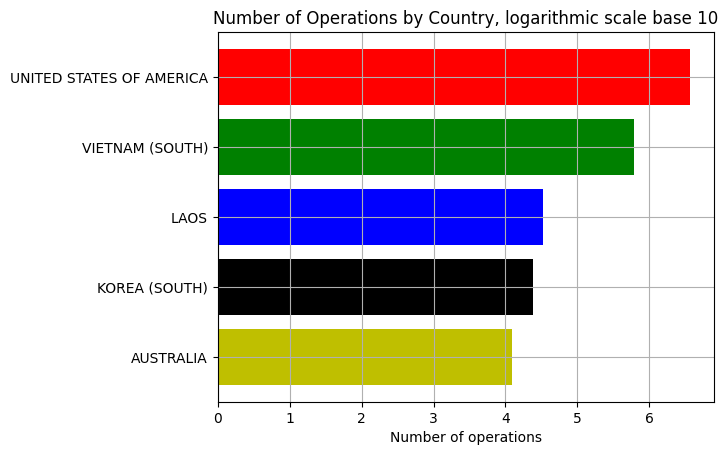

In [ ]:
# your code goes here
import numpy as np

df = spark.sql("SELECT ContryFlyingMission, COUNT(*) as NumOps from df_operations GROUP BY ContryFlyingMission ORDER BY NumOps DESC")
df_NumBombingOps = df.toPandas()
df_NumBombingOps['NumOps'] = np.log10(df_NumBombingOps['NumOps'])
plt.rcdefaults()
fig, ax = plt.subplots()


ax.barh(df_NumBombingOps['ContryFlyingMission'], df_NumBombingOps['NumOps'], align='center', color = 'rgbky')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of operations')
ax.set_title('Number of Operations by Country, logarithmic scale base 10')
ax.grid()


# Question 2: Show the number of missions in time for each of the countries involved.

Transform the dataframe to contain only relevant columns for this query. Observe that `MissionDate` field is of type string. You can use `F.to_date` to convert it to a `DateType`.

In [ ]:
# your code goes here
from pyspark.sql.functions import *
# Lo que pasó aquí es que usando el to_date ahora el MissionDate ya es un atributo de fecha.
df_TimeFixed = df_operations.select("ContryFlyingMission", to_date(df_operations.MissionDate, 'yyyy-MM-dd').alias('MissionDate'))
df_TimeFixed.show(10)

+--------------------+-----------+
| ContryFlyingMission|MissionDate|
+--------------------+-----------+
|UNITED STATES OF ...| 1971-06-05|
|UNITED STATES OF ...| 1972-12-26|
|UNITED STATES OF ...| 1973-07-28|
|UNITED STATES OF ...| 1970-02-02|
|     VIETNAM (SOUTH)| 1970-10-08|
|UNITED STATES OF ...| 1970-11-25|
|UNITED STATES OF ...| 1972-03-08|
|UNITED STATES OF ...| 1971-12-27|
|UNITED STATES OF ...| 1972-05-24|
|UNITED STATES OF ...| 1972-09-12|
+--------------------+-----------+
only showing top 10 rows



Now compute the count of missions per country for each `MissionDate` and sort the dataframe by date (ascending).

In [ ]:
# your code goes here
#Como ahora  MissionDate ya es una fecha y no un string, se puede ordenar utilizandolas como parametro
df_TimeFixed.createOrReplaceTempView("df_operations")
df = spark.sql("SELECT ContryFlyingMission, MissionDate, count(*) as NumOps from df_operations GROUP BY ContryFlyingMission, MissionDate order by MissionDate desc")
df.show()

+--------------------+-----------+------+
| ContryFlyingMission|MissionDate|NumOps|
+--------------------+-----------+------+
|UNITED STATES OF ...| 1975-06-30|    17|
|UNITED STATES OF ...| 1975-06-29|    15|
|UNITED STATES OF ...| 1975-06-28|    22|
|UNITED STATES OF ...| 1975-06-27|    30|
|UNITED STATES OF ...| 1975-06-26|    25|
|UNITED STATES OF ...| 1975-06-25|    28|
|UNITED STATES OF ...| 1975-06-24|    29|
|UNITED STATES OF ...| 1975-06-23|    24|
|UNITED STATES OF ...| 1975-06-22|    17|
|UNITED STATES OF ...| 1975-06-21|    23|
|UNITED STATES OF ...| 1975-06-20|    30|
|UNITED STATES OF ...| 1975-06-19|    29|
|UNITED STATES OF ...| 1975-06-18|    35|
|UNITED STATES OF ...| 1975-06-17|    35|
|UNITED STATES OF ...| 1975-06-16|    34|
|UNITED STATES OF ...| 1975-06-15|    11|
|UNITED STATES OF ...| 1975-06-14|    18|
|UNITED STATES OF ...| 1975-06-13|    32|
|UNITED STATES OF ...| 1975-06-12|    37|
|UNITED STATES OF ...| 1975-06-11|    35|
+--------------------+-----------+

Now we can plot the content with a different series for each country (using an appropriate plot type). To this end, you may use the pattern from "Slides Week 4" where we did a scatter plot colored by country.

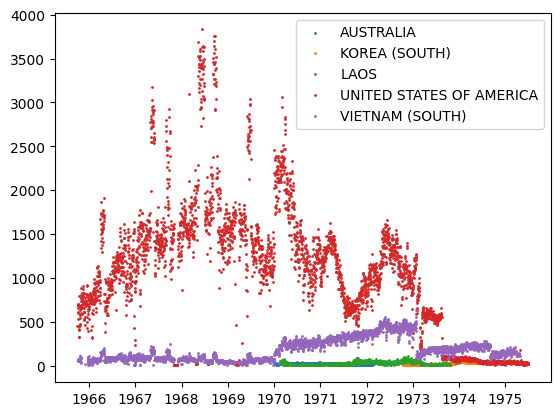

In [ ]:
# your code goes here
fig = plt.figure()
ax = fig.add_subplot(111)

df_Pandas = df.toPandas()

for country, Operation in df_Pandas.groupby("ContryFlyingMission"): 
    ax.scatter(Operation["MissionDate"], Operation["NumOps"], label=country, s=1)

plt.legend(loc='best')

We can observe how South Vietnam increased its missions starting from 1970. The drop in 1973 is motivated by the [Paris Peace Accords](https://en.wikipedia.org/wiki/Paris_Peace_Accords) that took place on January 27th, 1973, to establish peace in Vietnam and end the war.

The plot looks a bit erratic, as the count is computed for each date. We can alleviate this by instead having the x-axis be months, and the y-axis be the count of operations in that month. Recompute such a dataframe and plot it once more. To this end, `F.trunc` will come in handy.

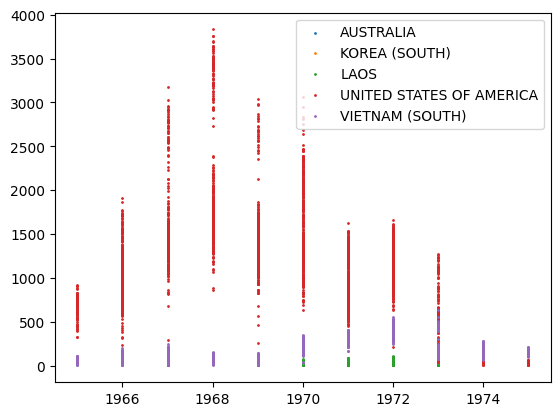

In [ ]:
# your code goes here
df_Trunc = df.select("ContryFlyingMission", trunc(df.MissionDate, 'year').alias('MissionDate'), "NumOps").toPandas()
fig = plt.figure()
ax = fig.add_subplot(111)

for country, Operation in df_Trunc.groupby("ContryFlyingMission"): 
    ax.scatter(Operation["MissionDate"], Operation["NumOps"], label=country, s=1)

plt.legend(loc='best')

----

# Question 3: Who bombed this location?

<img style="float: right;" src="https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/Hanoi_POL1966.jpg">

This picture is the Hanoi POL facility (North Vietnam) burning after it was attacked by the U.S. Air Force on 29 June 1966 in the context of the Rolling Thunder operation. 

We are interested in discovering what was the most common take-off location during that day. Transform the operations dataframe to contain operations for the date in question, then cache and execute this caching.

In [ ]:
# your code goes here
df_operations.createOrReplaceTempView("df_operations")
df = spark.sql("SELECT COUNT(*) as NumberOfBombingsOps from df_operations WHERE MissionDate = '1966-06-29' AND TargetCountry='NORTH VIETNAM'")
df.show(10)

+-------------------+
|NumberOfBombingsOps|
+-------------------+
|                395|
+-------------------+



Which coutries scheduled operations that day?

How many operations where done per country on this date?

In [ ]:
# your code goes here
df = spark.sql("SELECT ContryFlyingMission, COUNT(*) as NumberOfBombingsOps from df_operations WHERE MissionDate = '1966-06-29' and TargetCountry='NORTH VIETNAM' group by ContryFlyingMission")
df.show(10)
#se puede observar que en esa fecha hay registros de misiones de 
# Vietnam del sur y de US pero casi todas las operaciones fueron de parte de USA

+--------------------+-------------------+
| ContryFlyingMission|NumberOfBombingsOps|
+--------------------+-------------------+
|     VIETNAM (SOUTH)|                  6|
|UNITED STATES OF ...|                389|
+--------------------+-------------------+



Time the previous query using the `collect` action. Then cache the dataframe containing operations from the date in question, invoke an action and time the previous query on this cached dataframe. How much faster is the query on your cached dataframe?

In [ ]:
# your code goes here

Write the cached dataframe to disk and read it back (you needn't assign it to a variable when reading it in).

In [ ]:
# your code goes here

Show the number of operations per takeoff location, in descending order.

In [ ]:
# your code goes here
df_operations.createOrReplaceTempView("df_operations")
TOL = spark.sql("SELECT TakeoffLocation, count(*) as OperationsNumber from df_operations group by TakeoffLocation order by OperationsNumber desc") 
TOL.show()

+---------------+----------------+
|TakeoffLocation|OperationsNumber|
+---------------+----------------+
|       BIEN HOA|          492324|
|         DANANG|          489942|
|        UBON AB|          348822|
|   TAN SON NHUT|          311872|
|       UDORN AB|          306556|
|        CHU LAI|          242096|
|      PHAN RANG|          240238|
|    TONKIN GULF|          194191|
|  NAKHON PHANOM|          194069|
|          KORAT|          191081|
|      BINH THUY|          144003|
|        TUY HOA|          122547|
|         PLEIKU|          110322|
|   CAM RANH BAY|           96373|
|        U TAPAO|           85041|
|           VTBI|           75873|
|         TAKHLI|           65435|
|      NHA TRANG|           56818|
|           VVPU|           53814|
|        PHU CAT|           50353|
+---------------+----------------+
only showing top 20 rows



<img style="float: right;" src="https://raw.githubusercontent.com/epfl-ada/2019/c17af0d3c73f11cb083717b7408fedd86245dc4d/Tutorials/04%20-%20Scaling%20Up/img/USS_Constellation.jpg">


That day the most common take-off location was the ship USS Constellation (CV-64). We cannot univocally identify one take off location, but we can reduce the possible candidates. Next steps: explore TimeOnTarget feature.

_USS Constellation (CV-64), a Kitty Hawk-class supercarrier, was the third ship of the United States Navy to be named in honor of the "new constellation of stars" on the flag of the United States. One of the fastest ships in the Navy, as proven by her victory during a battlegroup race held in 1985, she was nicknamed "Connie" by her crew and officially as "America's Flagship"._

Finally, compute the mean, median first and third quantile of the `TimeOnTarget` value per takeoff location (you could make use of `F.percentile_approx` from pyspark 3.1.1 and up).  

In [ ]:
# your code goes here

----

# Question 4: What is the most used aircraft type during the Vietnam war (number of operations)?


Let's check the content of `Aircraft_Glossary`. Have a look at it using `show`.

In [ ]:
df_aircraft.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

How many unique values do we have in the `AirCraftType` column? Display them.

In [ ]:
# your code goes here
df_aircraft.createOrReplaceTempView("df_aircraft")
act_count = spark.sql("SELECT count(distinct(AirCraftType)) from df_aircraft")
act_count.show()

+----------------------------+
|count(DISTINCT AirCraftType)|
+----------------------------+
|                          59|
+----------------------------+



Both our dataframes has a column called `AirCraft` (a shared key between the two). Join the dataframes together and name the result `df_operations_aircrafts`.

In [ ]:
# your code goes here
df_operations_aircrafts = df_operations.join(df_aircraft, df_operations.AirCraft == df_aircraft.AirCraft)
df_operations_aircrafts.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              null|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                null|                  0|   EC-47|Douglas C-47 Skyt...|Military Transpor...|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              null|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                null|                  0|  

Determine the most used aircraft types for the entirety of the Vietnam War.

In [ ]:
# your code goes here 
missions_aircrafts = df_operations_aircrafts.select("AirCraftType")
missions_aircrafts.groupBy("AirCraftType").agg(count("*").alias("MissionsCount"))\
                  .sort(desc("MissionsCount"))\
                  .show()

+--------------------+-------------+
|        AirCraftType|MissionsCount|
+--------------------+-------------+
|  Fighter Jet Bomber|      1073126|
|         Fighter Jet|       882594|
|  Jet Fighter Bomber|       451385|
|     Attack Aircraft|       315246|
|Light ground-atta...|       267457|
|  Fighter bomber jet|       242231|
|Military Transpor...|       228426|
|  Utility Helicopter|       146653|
|    Strategic bomber|        99100|
|     Tactical Bomber|        82219|
|Observation Aircraft|        81820|
|Fixed wing ground...|        75058|
|Ground attack air...|        73843|
|Carrier-based Fig...|        58691|
|   Training Aircraft|        48435|
|       Light fighter|        39999|
|        Light Bomber|        39262|
|Light Tactical Bo...|        34738|
| Light Utility Plane|        28582|
|Observation/ Ligh...|        24491|
+--------------------+-------------+
only showing top 20 rows



Note: This dataset would require further cleaning and normalization. See `Fighter Jet Bomber`, `Jet Fighter Bomber`, `Fighter bomber jet`

Determine which aircraft types were fastest (on average) to complete their operations.

In [142]:
# your code goes here
Fastest_act = df_operations_aircrafts.groupBy('AirCraftType').mean('TimeOnTarget').sort('avg(TimeOnTarget)')
Fastest_act.show(5)
#pues con este podemos ver que el Aircraft que terminó su trabajo más rapido
#en promedio, fue Airliner/ Transport

+--------------------+-----------------+
|        AirCraftType|avg(TimeOnTarget)|
+--------------------+-----------------+
| Airliner/ Transport|              1.0|
|Light Utility Hel...|            145.0|
|    Cargo Prop plane|218.1818181818182|
|Primary Pilot Tra...|226.2008733624454|
|Carrier-based Ear...|407.8558077436582|
+--------------------+-----------------+
only showing top 5 rows



What join strategy was chosen by spark for this last query? (Inspect the Spark UI SQL query DAG). 

Finally, use the `hint` function to request spark to do a Shuffle Merge Sort Join (SMJ) for the previous query (see [here](https://towardsdatascience.com/about-joins-in-spark-3-0-1e0ea083ea86) for more information). Did the query become faster or slower?

In [ ]:
# your code goes here

# Additional material

* An animated timeline of bombing operations is available [here](https://cdn.filepicker.io/api/file/el7zpgfhTOqapUblTvUh) and discussions about the dataset [here](https://data.world/datamil/vietnam-war-thor-data/discuss/vietnam-war-thor-data/gftdgyjz).